In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Loading the data and creating DataFrame
df = pd.read_csv('./data/data_eda.csv')

In [3]:
# Checking the data
df.head()

,log_price,price,review_scores_rating,has_availability,property_type,instant_bookable,number_of_reviews_ltm,availability_60,review_scores_checkin,room_type,...,beds,host_response_time,host_is_superhost,bedrooms,latitude,minimum_nights,reviews_per_month,availability_90,bathrooms_text,availability_365
0,6.150603,469.0,100.0,True,14,False,0,0,10.0,0,...,7.0,1,False,5.0,43.64590,28,0.10,0,11,0
1,4.543295,94.0,97.0,True,21,True,0,60,10.0,2,...,1.0,0,False,1.0,43.64080,180,1.19,90,5,365
2,4.276666,72.0,95.0,True,36,True,0,60,10.0,2,...,1.0,1,False,1.0,43.69805,28,1.64,90,4,365
3,4.605170,100.0,93.0,True,14,False,2,0,10.0,0,...,2.0,4,False,2.0,43.63539,30,0.86,8,2,283
4,4.532599,93.0,99.0,True,24,False,1,58,10.0,2,...,2.0,3,False,2.0,43.74922,2,0.60,88,3,363


### In my dataframe I have both price and log_price. I will use both of them separately for modelling and compare the results.

### I will drop log_price first and do modelling on the remaining data

In [4]:
# Dropping the log_price
dfp = df.drop(['log_price'], axis = 1)
dfp.head()

,price,review_scores_rating,has_availability,property_type,instant_bookable,number_of_reviews_ltm,availability_60,review_scores_checkin,room_type,neighbourhood_cleansed,...,beds,host_response_time,host_is_superhost,bedrooms,latitude,minimum_nights,reviews_per_month,availability_90,bathrooms_text,availability_365
0,469.0,100.0,True,14,False,0,0,10.0,0,71,...,7.0,1,False,5.0,43.64590,28,0.10,0,11,0
1,94.0,97.0,True,21,True,0,60,10.0,2,122,...,1.0,0,False,1.0,43.64080,180,1.19,90,5,365
2,72.0,95.0,True,36,True,0,60,10.0,2,15,...,1.0,1,False,1.0,43.69805,28,1.64,90,4,365
3,100.0,93.0,True,14,False,2,0,10.0,0,109,...,2.0,4,False,2.0,43.63539,30,0.86,8,2,283
4,93.0,99.0,True,24,False,1,58,10.0,2,128,...,2.0,3,False,2.0,43.74922,2,0.60,88,3,363


In [5]:
# Split data into X and y
X = dfp.drop('price', axis = 1)
y = dfp['price']

In [6]:
# Checking X 
X

,review_scores_rating,has_availability,property_type,instant_bookable,number_of_reviews_ltm,availability_60,review_scores_checkin,room_type,neighbourhood_cleansed,accommodates,...,beds,host_response_time,host_is_superhost,bedrooms,latitude,minimum_nights,reviews_per_month,availability_90,bathrooms_text,availability_365
0,100.0,True,14,False,0,0,10.0,0,71,10,...,7.0,1,False,5.0,43.64590,28,0.10,0,11,0
1,97.0,True,21,True,0,60,10.0,2,122,2,...,1.0,0,False,1.0,43.64080,180,1.19,90,5,365
2,95.0,True,36,True,0,60,10.0,2,15,3,...,1.0,1,False,1.0,43.69805,28,1.64,90,4,365
3,93.0,True,14,False,2,0,10.0,0,109,5,...,2.0,4,False,2.0,43.63539,30,0.86,8,2,283
4,99.0,True,24,False,1,58,10.0,2,128,4,...,2.0,3,False,2.0,43.74922,2,0.60,88,3,363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10794,80.0,True,8,True,1,51,10.0,0,87,2,...,1.0,4,False,1.0,43.63780,1,1.00,81,7,81
10795,80.0,True,5,False,1,50,10.0,0,62,4,...,2.0,4,False,2.0,43.65734,2,1.00,70,2,70
10796,100.0,True,28,False,1,60,10.0,2,122,2,...,1.0,4,False,1.0,43.64015,1,1.00,89,4,89
10797,100.0,True,8,True,1,35,10.0,0,77,3,...,2.0,4,False,1.0,43.62431,2,1.00,65,2,65


In [7]:
# Checking y
y

0        469.0
1         94.0
2         72.0
3        100.0
4         93.0
         ...  
10794    114.0
10795     71.0
10796    195.0
10797    128.0
10798     88.0
Name: price, Length: 10799, dtype: float64

In [8]:
# Importing the train- test model from sklearn library
from sklearn.model_selection import train_test_split

In [9]:
# Split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [10]:
# Checking the length of different test and train sets
len(X_train),len(y_train),len(X_test),len(y_test)

(8639, 8639, 2160, 2160)

I am going to use 5 different machine learning models:

1. Linear Regression
2. Ridge Regression
3. Lasso Regression
4. K-Nearest Neighbors
5. Random Forest

### Using Linear Regression Model

In [11]:
# Importing LinearRegression model from sklearn library
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [12]:
# Fitting the model
lr.fit(X_train, y_train)

LinearRegression()

In [13]:
# Training Model Score
lr.score(X_train,y_train)

0.061344398052213034

In [14]:
#Making the predictions
y_preds = lr.predict(X_test)

In [15]:
# Making Predictions
y_preds

array([152.51537763, 396.70631501, 169.61407416, ..., 197.0695356 ,
        59.40381181, 114.92010621])

In [16]:
# Test Model Score
lr.score(X_test, y_test)

0.0735291693783352

In [17]:
# Importing mean_absolute_errora and mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(mean_absolute_error(y_test, y_preds))

78.08319508426798


In [18]:
# Calculating mean_squared_error
print(mean_squared_error(y_test, y_preds))

73567.52101693272


In [19]:
# Calculating mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_preds))
rmse

271.23333315972195

/Users/gurkirpalparmar/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/gurkirpalparmar/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


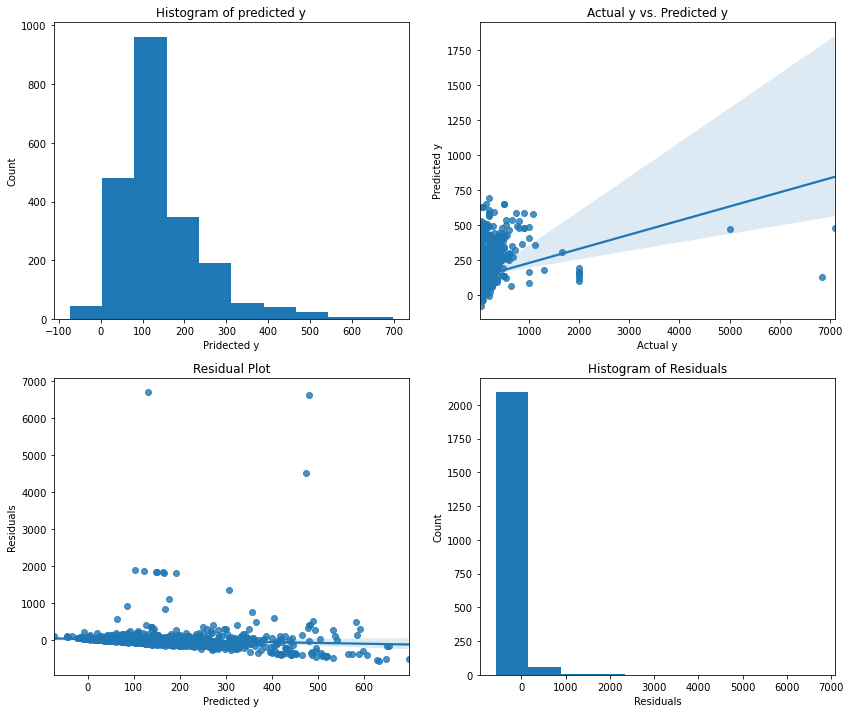

In [20]:
fig,ax = plt.subplots(nrows = 2, ncols =2, figsize = (14,12))
ax[0,0].hist(y_preds)
ax[0,0].set_title('Histogram of predicted y')
ax[0,0].set_xlabel('Pridected y')
ax[0,0].set_ylabel('Count')

sns.regplot(y_test, y_preds, ax = ax[0,1])
ax[0,1].set_title('Actual y vs. Predicted y')
ax[0,1].set_xlabel('Actual y')
ax[0,1].set_ylabel('Predicted y')

sns.regplot(y_preds, y_test - y_preds, ax= ax[1,0])
ax[1,0].set_title('Residual Plot')
ax[1,0].set_xlabel('Predicted y')
ax[1,0].set_ylabel('Residuals')

ax[1,1].hist(y_test - y_preds)
ax[1,1].set_title('Histogram of Residuals')
ax[1,1].set_xlabel('Residuals')
ax[1,1].set_ylabel('Count');

### Using Ridge Regression

In [21]:
# Importing the model
from sklearn.linear_model import Ridge
ri = Ridge()

In [22]:
# Fitting the model on training data
ri.fit(X_train, y_train)

Ridge()

In [23]:
# Finding Train model score
ri.score(X_train, y_train)

0.06133767751326158

In [24]:
# Making Predictions
yr_preds = ri.predict(X_test)

In [25]:
# Getting Predictions
yr_preds

array([151.634356  , 394.62893273, 169.04426064, ..., 196.98557016,
        58.44017313, 115.33083515])

In [26]:
# Finding test model score
ri.score(X_test, y_test)

0.07380025062271112

In [27]:
# Calculating Mean absolute error
print(mean_absolute_error(y_test, yr_preds))

77.91559418951165


In [28]:
# Calculating Mean Squared error
print(mean_squared_error(y_test, yr_preds))

73545.9954874894


In [29]:
# Calculating Root Mean Squared error
rmse = print(np.sqrt(mean_squared_error(y_test, yr_preds)))
rmse

271.1936494232293


/Users/gurkirpalparmar/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/gurkirpalparmar/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


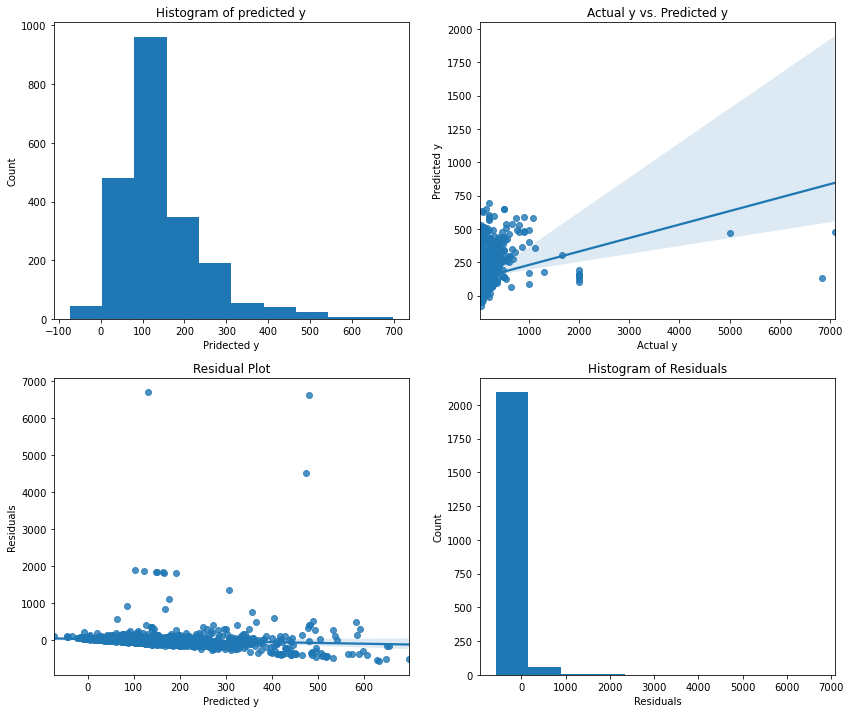

In [30]:
fig,ax = plt.subplots(nrows = 2, ncols =2, figsize = (14,12))
ax[0,0].hist(y_preds)
ax[0,0].set_title('Histogram of predicted y')
ax[0,0].set_xlabel('Pridected y')
ax[0,0].set_ylabel('Count')

sns.regplot(y_test, y_preds, ax = ax[0,1])
ax[0,1].set_title('Actual y vs. Predicted y')
ax[0,1].set_xlabel('Actual y')
ax[0,1].set_ylabel('Predicted y')

sns.regplot(y_preds, y_test - y_preds, ax= ax[1,0])
ax[1,0].set_title('Residual Plot')
ax[1,0].set_xlabel('Predicted y')
ax[1,0].set_ylabel('Residuals')

ax[1,1].hist(y_test - y_preds)
ax[1,1].set_title('Histogram of Residuals')
ax[1,1].set_xlabel('Residuals')
ax[1,1].set_ylabel('Count');

### Using Lasso Regression

In [31]:
# Importing the model
from sklearn.linear_model import Lasso
la=Lasso()

In [32]:
# Fitting the model on training data
la.fit(X_train, y_train)

Lasso()

In [33]:
# Finding Train model score
la.score(X_train, y_train)

0.058782741701495334

In [34]:
# Making Predictions
yl_preds = la.predict(X_test)

In [35]:
# Getting Predictions
yl_preds

array([131.77533943, 352.90148309, 151.3426068 , ..., 188.79780912,
        43.63211814, 120.31139709])

In [36]:
# Finding test model score
la.score(X_test, y_test)

0.07470821319845655

In [37]:
# Calculating Mean absolute error
print(mean_absolute_error(y_test, yl_preds))

76.96539809496528


In [38]:
# Calculating Mean Squared  error
print(mean_squared_error(y_test, yl_preds))

73473.8976365199


In [39]:
# Calculating Root Mean squared error
rmse = print(np.sqrt(mean_squared_error(y_test, yl_preds)))
rmse

271.0606899506454


/Users/gurkirpalparmar/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/gurkirpalparmar/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


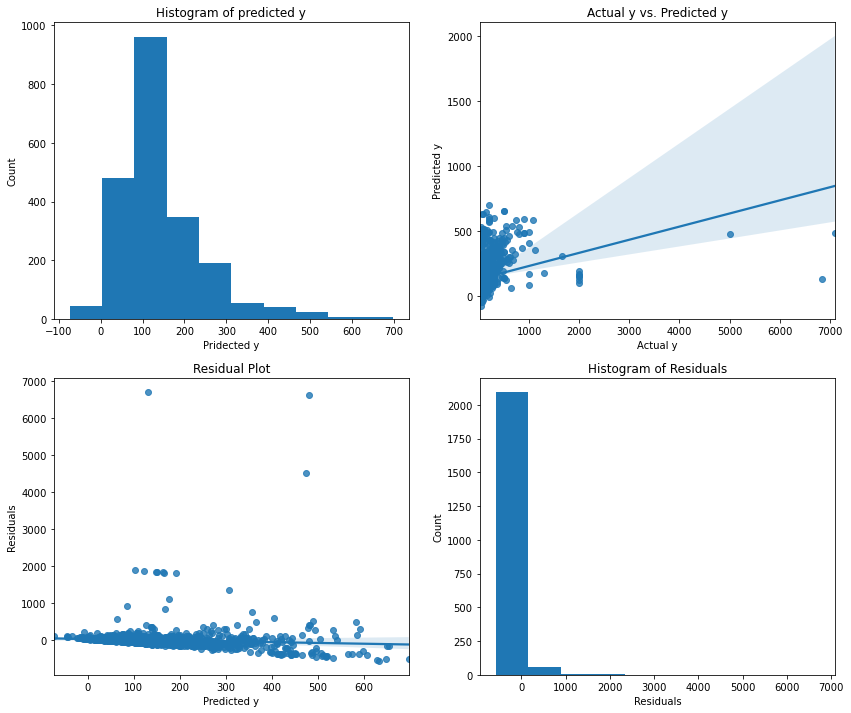

In [40]:
fig,ax = plt.subplots(nrows = 2, ncols =2, figsize = (14,12))
ax[0,0].hist(y_preds)
ax[0,0].set_title('Histogram of predicted y')
ax[0,0].set_xlabel('Pridected y')
ax[0,0].set_ylabel('Count')

sns.regplot(y_test, y_preds, ax = ax[0,1])
ax[0,1].set_title('Actual y vs. Predicted y')
ax[0,1].set_xlabel('Actual y')
ax[0,1].set_ylabel('Predicted y')

sns.regplot(y_preds, y_test - y_preds, ax= ax[1,0])
ax[1,0].set_title('Residual Plot')
ax[1,0].set_xlabel('Predicted y')
ax[1,0].set_ylabel('Residuals')

ax[1,1].hist(y_test - y_preds)
ax[1,1].set_title('Histogram of Residuals')
ax[1,1].set_xlabel('Residuals')
ax[1,1].set_ylabel('Count');

### Using K-Nearest Neighbors

In [41]:
# Importing the model
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

In [42]:
# Fitting the model on training data
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [43]:
# Finding Train model score
knn.score(X_train, y_train)

0.28814427788292574

In [44]:
# Making Predictions
yk_preds = knn.predict(X_test)

In [45]:
# Getting Predictions
yk_preds

array([138.8,  55.8, 106. , ..., 180.8,  55.2, 101.8])

In [46]:
# Finding test model score
knn.score(X_test, y_test)

-0.5354989050389554

In [47]:
# Calculating Mean absolute error
print(mean_absolute_error(y_test, yk_preds))

90.88268518518518


In [48]:
# Calculating Mean Squared error
print(mean_squared_error(y_test, yk_preds))

121928.12146296295


In [49]:
# Calculating Root Mean Squared error
rmse = print(np.sqrt(mean_squared_error(y_test, yk_preds)))
rmse

349.1820749450965


/Users/gurkirpalparmar/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/gurkirpalparmar/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


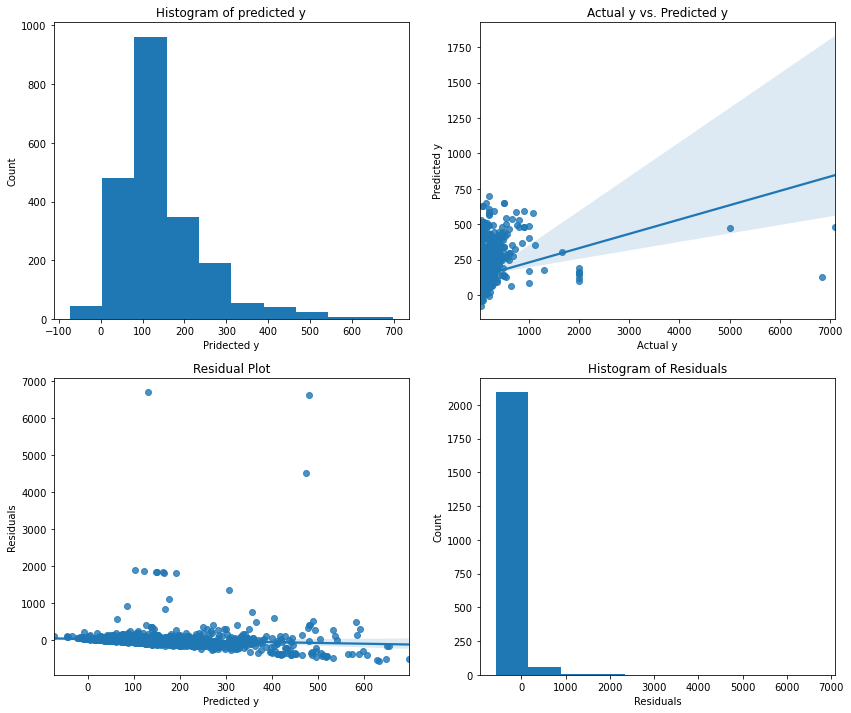

In [50]:
fig,ax = plt.subplots(nrows = 2, ncols =2, figsize = (14,12))
ax[0,0].hist(y_preds)
ax[0,0].set_title('Histogram of predicted y')
ax[0,0].set_xlabel('Pridected y')
ax[0,0].set_ylabel('Count')

sns.regplot(y_test, y_preds, ax = ax[0,1])
ax[0,1].set_title('Actual y vs. Predicted y')
ax[0,1].set_xlabel('Actual y')
ax[0,1].set_ylabel('Predicted y')

sns.regplot(y_preds, y_test - y_preds, ax= ax[1,0])
ax[1,0].set_title('Residual Plot')
ax[1,0].set_xlabel('Predicted y')
ax[1,0].set_ylabel('Residuals')

ax[1,1].hist(y_test - y_preds)
ax[1,1].set_title('Histogram of Residuals')
ax[1,1].set_xlabel('Residuals')
ax[1,1].set_ylabel('Count');

### Using Random Forest

In [51]:
# Importing the model
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [52]:
# Fitting the model on training data
rf.fit(X_train, y_train)

RandomForestRegressor()

In [53]:
# Finding Train model score
rf.score(X_train, y_train)

0.8953462319567179

In [54]:
# Making Predictions
yrf_preds = rf.predict(X_test)

In [55]:
yrf_preds

array([145.23,  65.03, 222.73, ..., 150.7 ,  74.03,  93.27])

In [56]:
# Finding test model score
rf.score(X_test, y_test)

-0.28712153623694614

In [57]:
# Calculating Mean absolute error
print(mean_absolute_error(y_test, yrf_preds))

76.60749074074074


In [58]:
# Calculating Mean Squared error
print(mean_squared_error(y_test, yrf_preds))

102205.4203313889


In [59]:
# Calculating Root Mean Squared error
rmse = print(np.sqrt(mean_squared_error(y_test, yrf_preds)))
rmse

319.69582470121327


/Users/gurkirpalparmar/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/gurkirpalparmar/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


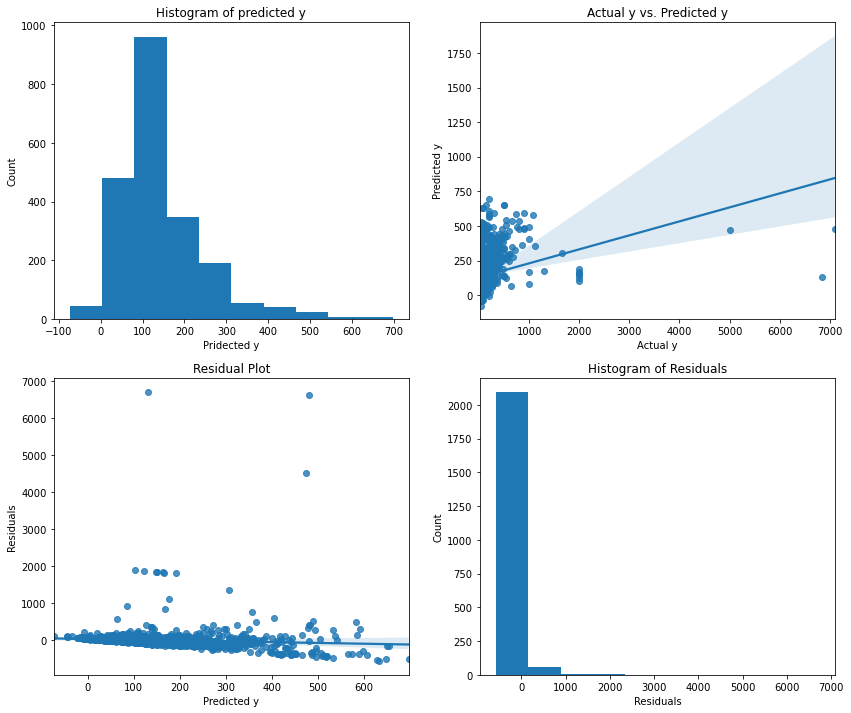

In [60]:
fig,ax = plt.subplots(nrows = 2, ncols =2, figsize = (14,12))
ax[0,0].hist(y_preds)
ax[0,0].set_title('Histogram of predicted y')
ax[0,0].set_xlabel('Pridected y')
ax[0,0].set_ylabel('Count')

sns.regplot(y_test, y_preds, ax = ax[0,1])
ax[0,1].set_title('Actual y vs. Predicted y')
ax[0,1].set_xlabel('Actual y')
ax[0,1].set_ylabel('Predicted y')

sns.regplot(y_preds, y_test - y_preds, ax= ax[1,0])
ax[1,0].set_title('Residual Plot')
ax[1,0].set_xlabel('Predicted y')
ax[1,0].set_ylabel('Residuals')

ax[1,1].hist(y_test - y_preds)
ax[1,1].set_title('Histogram of Residuals')
ax[1,1].set_xlabel('Residuals')
ax[1,1].set_ylabel('Count');

In [61]:
# Pandas DataFrame for Model and RMSE
model = pd.Series(['Linear', 'Ridge', 'Lasso', 'KNN', 'RandomForest'])
rmse = pd.Series([181.9940652717899, 181.95542825588734, 181.82016045180006, 309.0462059424244, 210.17206616588035])
modelRmsedf = pd.DataFrame({'Model':model, 'RMSE':rmse})
modelRmsedf

,Model,RMSE
0,Linear,181.994065
1,Ridge,181.955428
2,Lasso,181.820160
3,KNN,309.046206
4,RandomForest,210.172066


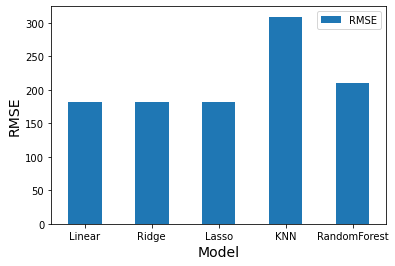

In [62]:
# Bar Plot of Models and their RMSE values
modelRmsedf.plot(x = 'Model', y = 'RMSE', kind = 'bar')
plt.xlabel('Model', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(rotation=0)
plt.show()

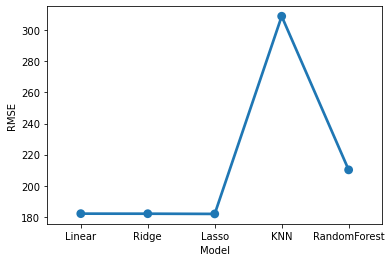

In [63]:
# Pointplot of RMSE values
fig, axes = plt.subplots()
sns.pointplot(x = 'Model', y = 'RMSE', data = modelRmsedf)
plt.show()

* Lasso Regression has the best Root Mean Square Error (RMSE) when Price column is used.


### I will drop 'price' column now and do modelling on the remaining data

In [64]:
# Checking the original data
df.head()

,log_price,price,review_scores_rating,has_availability,property_type,instant_bookable,number_of_reviews_ltm,availability_60,review_scores_checkin,room_type,...,beds,host_response_time,host_is_superhost,bedrooms,latitude,minimum_nights,reviews_per_month,availability_90,bathrooms_text,availability_365
0,6.150603,469.0,100.0,True,14,False,0,0,10.0,0,...,7.0,1,False,5.0,43.64590,28,0.10,0,11,0
1,4.543295,94.0,97.0,True,21,True,0,60,10.0,2,...,1.0,0,False,1.0,43.64080,180,1.19,90,5,365
2,4.276666,72.0,95.0,True,36,True,0,60,10.0,2,...,1.0,1,False,1.0,43.69805,28,1.64,90,4,365
3,4.605170,100.0,93.0,True,14,False,2,0,10.0,0,...,2.0,4,False,2.0,43.63539,30,0.86,8,2,283
4,4.532599,93.0,99.0,True,24,False,1,58,10.0,2,...,2.0,3,False,2.0,43.74922,2,0.60,88,3,363


In [65]:
# Dropping the price column
dfp = df.drop(['price'], axis = 1)
dfp.head()

,log_price,review_scores_rating,has_availability,property_type,instant_bookable,number_of_reviews_ltm,availability_60,review_scores_checkin,room_type,neighbourhood_cleansed,...,beds,host_response_time,host_is_superhost,bedrooms,latitude,minimum_nights,reviews_per_month,availability_90,bathrooms_text,availability_365
0,6.150603,100.0,True,14,False,0,0,10.0,0,71,...,7.0,1,False,5.0,43.64590,28,0.10,0,11,0
1,4.543295,97.0,True,21,True,0,60,10.0,2,122,...,1.0,0,False,1.0,43.64080,180,1.19,90,5,365
2,4.276666,95.0,True,36,True,0,60,10.0,2,15,...,1.0,1,False,1.0,43.69805,28,1.64,90,4,365
3,4.605170,93.0,True,14,False,2,0,10.0,0,109,...,2.0,4,False,2.0,43.63539,30,0.86,8,2,283
4,4.532599,99.0,True,24,False,1,58,10.0,2,128,...,2.0,3,False,2.0,43.74922,2,0.60,88,3,363


In [66]:
# Split data into X and y
X = dfp.drop('log_price', axis = 1)
y = dfp['log_price']

In [67]:
# Checking X
X

,review_scores_rating,has_availability,property_type,instant_bookable,number_of_reviews_ltm,availability_60,review_scores_checkin,room_type,neighbourhood_cleansed,accommodates,...,beds,host_response_time,host_is_superhost,bedrooms,latitude,minimum_nights,reviews_per_month,availability_90,bathrooms_text,availability_365
0,100.0,True,14,False,0,0,10.0,0,71,10,...,7.0,1,False,5.0,43.64590,28,0.10,0,11,0
1,97.0,True,21,True,0,60,10.0,2,122,2,...,1.0,0,False,1.0,43.64080,180,1.19,90,5,365
2,95.0,True,36,True,0,60,10.0,2,15,3,...,1.0,1,False,1.0,43.69805,28,1.64,90,4,365
3,93.0,True,14,False,2,0,10.0,0,109,5,...,2.0,4,False,2.0,43.63539,30,0.86,8,2,283
4,99.0,True,24,False,1,58,10.0,2,128,4,...,2.0,3,False,2.0,43.74922,2,0.60,88,3,363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10794,80.0,True,8,True,1,51,10.0,0,87,2,...,1.0,4,False,1.0,43.63780,1,1.00,81,7,81
10795,80.0,True,5,False,1,50,10.0,0,62,4,...,2.0,4,False,2.0,43.65734,2,1.00,70,2,70
10796,100.0,True,28,False,1,60,10.0,2,122,2,...,1.0,4,False,1.0,43.64015,1,1.00,89,4,89
10797,100.0,True,8,True,1,35,10.0,0,77,3,...,2.0,4,False,1.0,43.62431,2,1.00,65,2,65


In [68]:
# Checking y
y

0        6.150603
1        4.543295
2        4.276666
3        4.605170
4        4.532599
           ...   
10794    4.736198
10795    4.262680
10796    5.273000
10797    4.852030
10798    4.477337
Name: log_price, Length: 10799, dtype: float64

In [69]:
# Split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [70]:
# Checking the length of different test and train sets
len(X_train),len(y_train),len(X_test),len(y_test)

(8639, 8639, 2160, 2160)

### Using Linear Regression Model

In [71]:
# Importing LinearRegression model from sklearn library
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [72]:
# Fitting the model
lr.fit(X_train, y_train)

LinearRegression()

In [73]:
# Training Model Score
lr.score(X_train,y_train)

0.5211658877435631

In [74]:
#Making the predictions
y_preds = lr.predict(X_test)

In [75]:
y_preds

array([5.20659198, 4.40771471, 3.68210404, ..., 4.91797997, 5.30276661,
       4.7334586 ])

In [76]:
# Test Model Score
lr.score(X_test, y_test)

0.5526405738623663

In [77]:
# Calculating Mean Absolute Error
print(mean_absolute_error(y_test, y_preds))

0.3441691515002097


In [78]:
# Calculating mean_squared_error
print(mean_squared_error(y_test, y_preds))

0.22287991587755274


In [79]:
# Calculating Root Mean Squared Error
rmse = print(np.sqrt(mean_squared_error(y_test, y_preds)))
rmse

0.4721015948686816


/Users/gurkirpalparmar/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/gurkirpalparmar/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


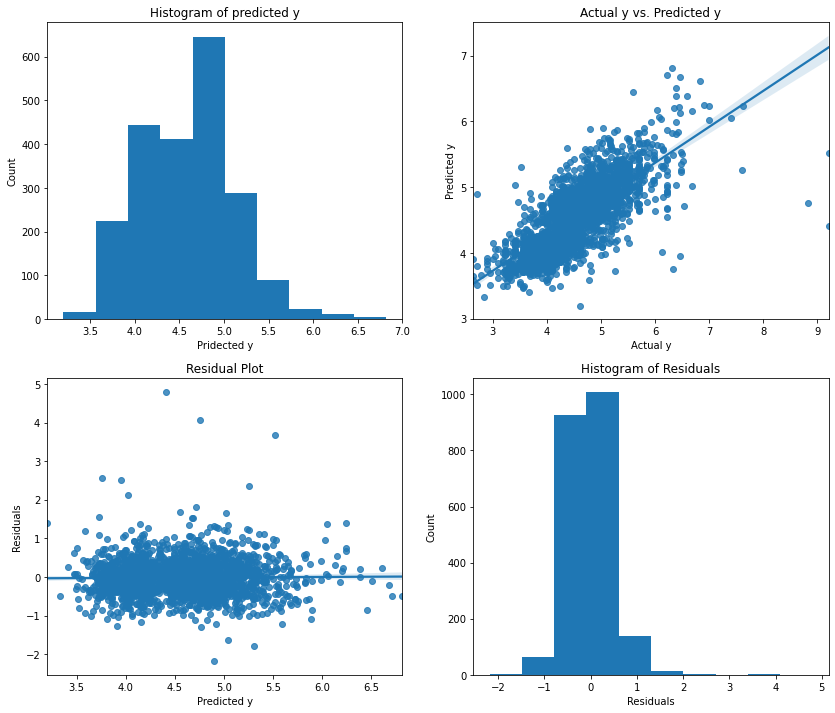

In [80]:
fig,ax = plt.subplots(nrows = 2, ncols =2, figsize = (14,12))
ax[0,0].hist(y_preds)
ax[0,0].set_title('Histogram of predicted y')
ax[0,0].set_xlabel('Pridected y')
ax[0,0].set_ylabel('Count')

sns.regplot(y_test, y_preds, ax = ax[0,1])
ax[0,1].set_title('Actual y vs. Predicted y')
ax[0,1].set_xlabel('Actual y')
ax[0,1].set_ylabel('Predicted y')

sns.regplot(y_preds, y_test - y_preds, ax= ax[1,0])
ax[1,0].set_title('Residual Plot')
ax[1,0].set_xlabel('Predicted y')
ax[1,0].set_ylabel('Residuals')

ax[1,1].hist(y_test - y_preds)
ax[1,1].set_title('Histogram of Residuals')
ax[1,1].set_xlabel('Residuals')
ax[1,1].set_ylabel('Count');

### Using Ridge Regression

In [81]:
# Importing the model
from sklearn.linear_model import Ridge
ri = Ridge()

In [82]:
# Fitting the model on training data
ri.fit(X_train, y_train)

Ridge()

In [83]:
# Finding Train model score
ri.score(X_train, y_train)

0.5210905681827449

In [84]:
# Making Predictions
yr_preds = ri.predict(X_test)

In [85]:
yr_preds

array([5.20447091, 4.42234143, 3.69140908, ..., 4.9167219 , 5.30341436,
       4.72278321])

In [86]:
# Finding test model score
ri.score(X_test, y_test)

0.552727496615558

In [87]:
# Calculating Mean absolute error
print(mean_absolute_error(y_test, yr_preds))

0.344181418202247


In [88]:
# Calculating Mean Squared error
print(mean_squared_error(y_test, yr_preds))

0.22283660990301124


In [89]:
# Calculating Root Mean Squared error
rmse = print(np.sqrt(mean_squared_error(y_test, yr_preds)))
rmse

0.47205572753967434


/Users/gurkirpalparmar/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/gurkirpalparmar/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


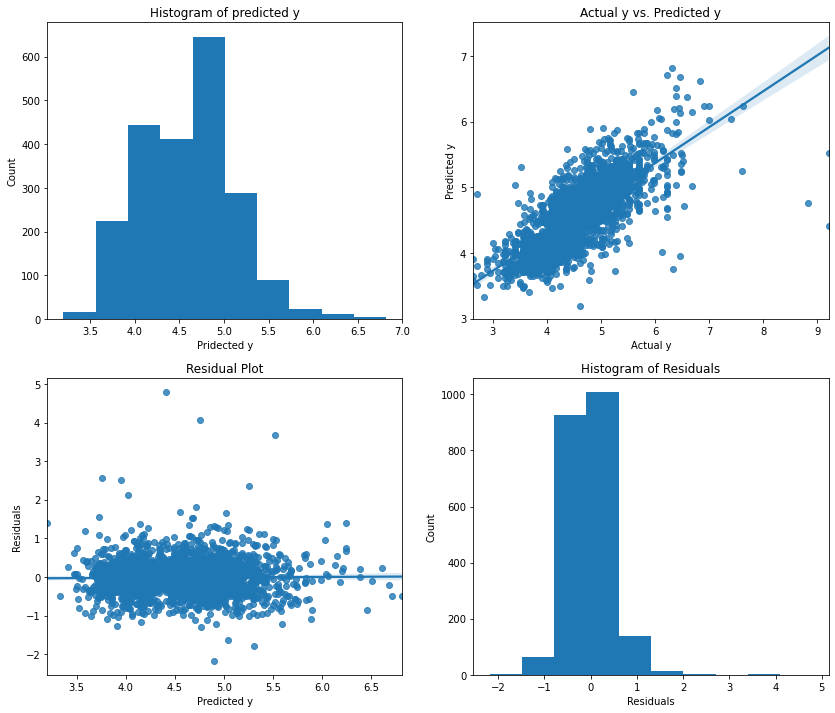

In [90]:
fig,ax = plt.subplots(nrows = 2, ncols =2, figsize = (14,12))
ax[0,0].hist(y_preds)
ax[0,0].set_title('Histogram of predicted y')
ax[0,0].set_xlabel('Pridected y')
ax[0,0].set_ylabel('Count')

sns.regplot(y_test, y_preds, ax = ax[0,1])
ax[0,1].set_title('Actual y vs. Predicted y')
ax[0,1].set_xlabel('Actual y')
ax[0,1].set_ylabel('Predicted y')

sns.regplot(y_preds, y_test - y_preds, ax= ax[1,0])
ax[1,0].set_title('Residual Plot')
ax[1,0].set_xlabel('Predicted y')
ax[1,0].set_ylabel('Residuals')

ax[1,1].hist(y_test - y_preds)
ax[1,1].set_title('Histogram of Residuals')
ax[1,1].set_xlabel('Residuals')
ax[1,1].set_ylabel('Count');

### Using Lasso Regression

In [91]:
# Importing the model
from sklearn.linear_model import Lasso
la=Lasso()

In [92]:
# Fitting the model on training data
la.fit(X_train, y_train)

Lasso()

In [93]:
# Finding Train model score
la.score(X_train, y_train)

0.23025378180277867

In [94]:
# Making Predictions
yl_preds = la.predict(X_test)

In [95]:
# Getting Predictions
yl_preds

array([4.87524707, 4.72328604, 4.25697939, ..., 4.75927772, 4.66641395,
       4.72837086])

In [96]:
# Finding test model score
la.score(X_test, y_test)

0.24934020342244068

In [97]:
# Calculating Mean absolute error
print(mean_absolute_error(y_test, yl_preds))

0.4601801442730894


In [98]:
# Calculating Mean Squared  error
print(mean_squared_error(y_test, yl_preds))

0.37398785526516193


In [99]:
# Calculating Root Mean squared error
rmse = print(np.sqrt(mean_squared_error(y_test, yl_preds)))
rmse

0.6115454645937307


/Users/gurkirpalparmar/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/gurkirpalparmar/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


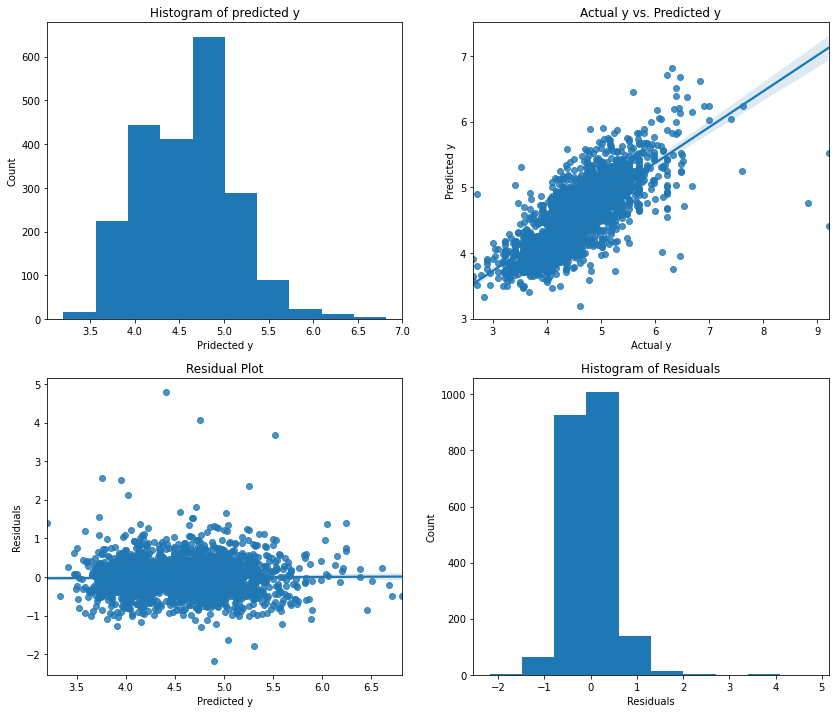

In [100]:
fig,ax = plt.subplots(nrows = 2, ncols =2, figsize = (14,12))
ax[0,0].hist(y_preds)
ax[0,0].set_title('Histogram of predicted y')
ax[0,0].set_xlabel('Pridected y')
ax[0,0].set_ylabel('Count')

sns.regplot(y_test, y_preds, ax = ax[0,1])
ax[0,1].set_title('Actual y vs. Predicted y')
ax[0,1].set_xlabel('Actual y')
ax[0,1].set_ylabel('Predicted y')

sns.regplot(y_preds, y_test - y_preds, ax= ax[1,0])
ax[1,0].set_title('Residual Plot')
ax[1,0].set_xlabel('Predicted y')
ax[1,0].set_ylabel('Residuals')

ax[1,1].hist(y_test - y_preds)
ax[1,1].set_title('Histogram of Residuals')
ax[1,1].set_xlabel('Residuals')
ax[1,1].set_ylabel('Count');

### Using K-Nearest Neighbors

In [101]:
# Importing the model
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

In [102]:
# Fitting the model on training data
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [103]:
# Finding Train model score
knn.score(X_train, y_train)

0.5743423899571568

In [104]:
# Making Predictions
yk_preds = knn.predict(X_test)

In [105]:
yk_preds

array([5.33277161, 4.75524582, 4.22165993, ..., 5.1674359 , 5.28256873,
       4.69490762])

In [106]:
# Finding test model score
knn.score(X_test, y_test)

0.3742192851676803

In [107]:
# Calculating Mean absolute error
print(mean_absolute_error(y_test, yk_preds))

0.41427848278447127


In [108]:
# Calculating Mean Squared error
print(mean_squared_error(y_test, yk_preds))

0.3117715754506354


In [109]:
# Calculating Root Mean Squared error
rmse = print(np.sqrt(mean_squared_error(y_test, yk_preds)))
rmse

0.5583650915401458


/Users/gurkirpalparmar/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/gurkirpalparmar/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


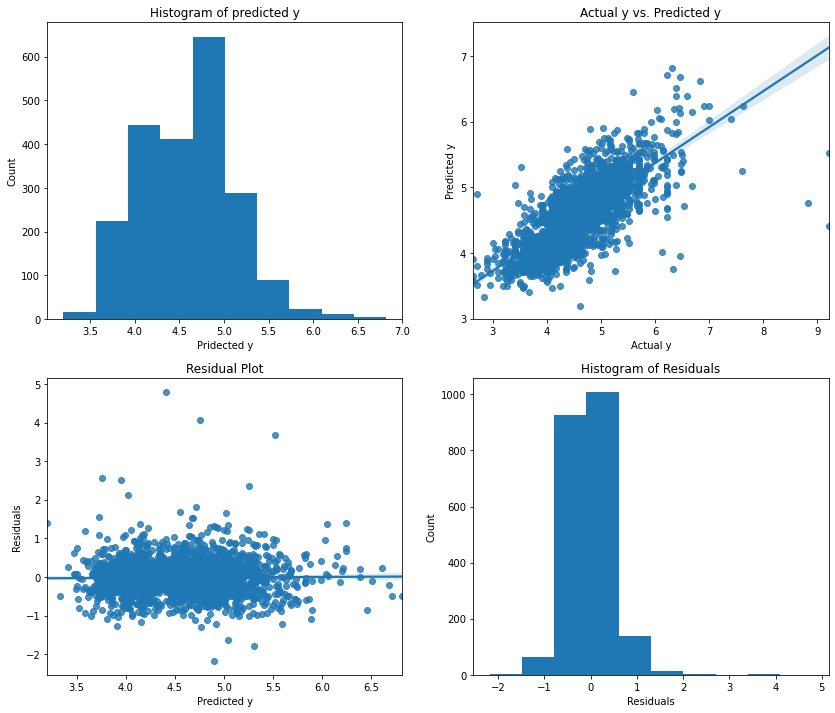

In [110]:
fig,ax = plt.subplots(nrows = 2, ncols =2, figsize = (14,12))
ax[0,0].hist(y_preds)
ax[0,0].set_title('Histogram of predicted y')
ax[0,0].set_xlabel('Pridected y')
ax[0,0].set_ylabel('Count')

sns.regplot(y_test, y_preds, ax = ax[0,1])
ax[0,1].set_title('Actual y vs. Predicted y')
ax[0,1].set_xlabel('Actual y')
ax[0,1].set_ylabel('Predicted y')

sns.regplot(y_preds, y_test - y_preds, ax= ax[1,0])
ax[1,0].set_title('Residual Plot')
ax[1,0].set_xlabel('Predicted y')
ax[1,0].set_ylabel('Residuals')

ax[1,1].hist(y_test - y_preds)
ax[1,1].set_title('Histogram of Residuals')
ax[1,1].set_xlabel('Residuals')
ax[1,1].set_ylabel('Count');

### Using Random Forest

In [111]:
# Importing the model
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [112]:
# Fitting the model on training data
rf.fit(X_train, y_train)

RandomForestRegressor()

In [113]:
# Finding Train model score
rf.score(X_train, y_train)

0.9466793517795205

In [114]:
# Making Predictions
yrf_preds = rf.predict(X_test)
yrf_preds

array([5.10803431, 4.71509832, 3.51797261, ..., 4.63586876, 5.77858646,
       4.4356445 ])

In [115]:
# Finding test model score
rf.score(X_test, y_test)

0.6431629716218571

In [116]:
# Calculating Mean absolute error
print(mean_absolute_error(y_test, yrf_preds))

0.2999816144747591


In [117]:
# Calculating Mean Squared error
print(mean_squared_error(y_test, yrf_preds))

0.17778055456117242


In [118]:
# Calculating Root Mean Squared error
rmse = print(np.sqrt(mean_squared_error(y_test, yrf_preds)))
rmse

0.4216403142029619


/Users/gurkirpalparmar/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/gurkirpalparmar/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


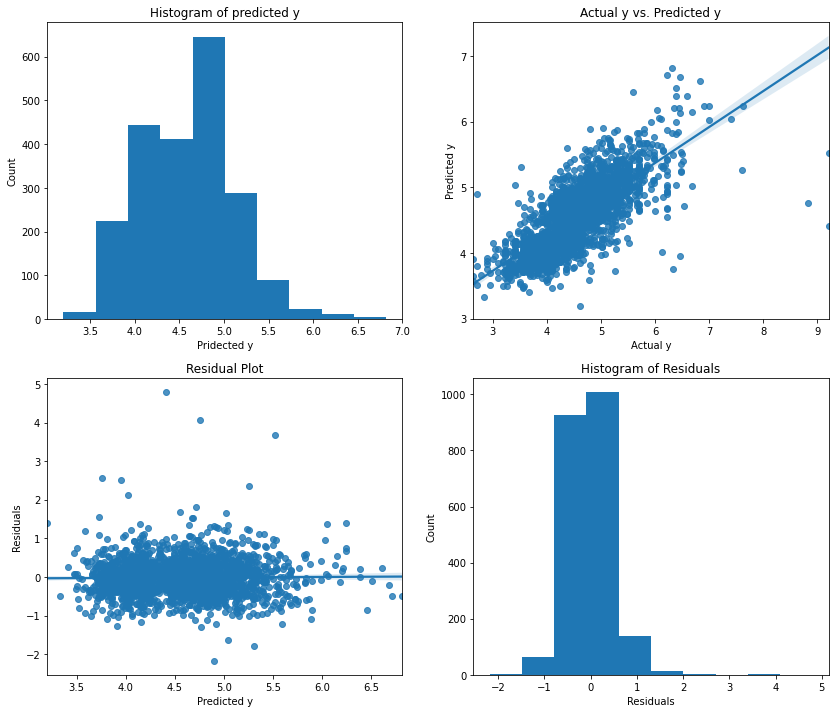

In [119]:
fig,ax = plt.subplots(nrows = 2, ncols =2, figsize = (14,12))
ax[0,0].hist(y_preds)
ax[0,0].set_title('Histogram of predicted y')
ax[0,0].set_xlabel('Pridected y')
ax[0,0].set_ylabel('Count')

sns.regplot(y_test, y_preds, ax = ax[0,1])
ax[0,1].set_title('Actual y vs. Predicted y')
ax[0,1].set_xlabel('Actual y')
ax[0,1].set_ylabel('Predicted y')

sns.regplot(y_preds, y_test - y_preds, ax= ax[1,0])
ax[1,0].set_title('Residual Plot')
ax[1,0].set_xlabel('Predicted y')
ax[1,0].set_ylabel('Residuals')

ax[1,1].hist(y_test - y_preds)
ax[1,1].set_title('Histogram of Residuals')
ax[1,1].set_xlabel('Residuals')
ax[1,1].set_ylabel('Count');

In [120]:
# Pandas DataFrame for Model and RMSE
model = pd.Series(['Linear', 'Ridge', 'Lasso', 'KNN', 'RandomForest'])
rmse = pd.Series([0.49536088260964045, 0.4954181900871106, 0.6278340735845795, 0.5832063877032158, 0.4299658657446595])
modelRmsedf = pd.DataFrame({'Model':model, 'RMSE':rmse})
modelRmsedf

,Model,RMSE
0,Linear,0.495361
1,Ridge,0.495418
2,Lasso,0.627834
3,KNN,0.583206
4,RandomForest,0.429966


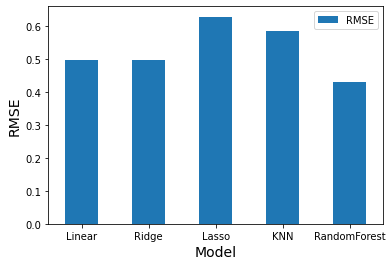

In [121]:
# Bar Plot of Models and their RMSE values
modelRmsedf.plot(x = 'Model', y = 'RMSE', kind = 'bar')
plt.xlabel('Model', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(rotation=0)
plt.show()

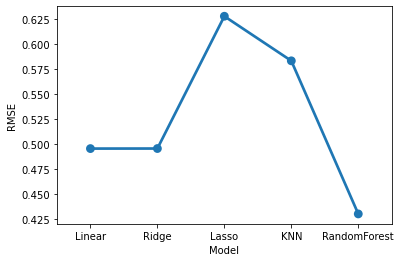

In [122]:
# Pointplot of RMSE values
fig, axes = plt.subplots()
sns.pointplot(x = 'Model', y = 'RMSE', data = modelRmsedf)
plt.show()

* RandomForest has the best Root Mean Square Error (RMSE) when logPrice column is used.

### Conclusion

I tried 5 different models on Airbnb listing price prediction

1. Linear Regression
2. Ridge Regression
3. Lasso Regression
4. K-Nearest Neighbors
5. Random Forest

* Lasso Regression has the best Root Mean Square Error (RMSE) when Price column is used.

* RandomForest has the best Root Mean Square Error (RMSE) when log_Price column is used.

* Linear regression models did not perform well because there are less data points with price above dollar 200 and looks like they have a different linear relationship. 50% listings are below dollar 99.

* RSME can be improved further by fine tuning the hyperparameters.

